In [1]:
from pyevolve import G1DList
from pyevolve import GSimpleGA
from pyevolve import Selectors
from pyevolve import Mutators
from pyevolve import Statistics
from pyevolve import Crossovers
from pyevolve import Consts
from geopy.distance import geodesic
from matplotlib.pyplot import plot
import random

In [2]:
LAT = [16.47, 16.47, 20.09, 22.39, 25.23, 22.00, 20.47, 
       17.20, 16.30, 14.05, 16.53, 21.52, 19.41, 20.09]

LON = [96.10, 94.44, 92.54, 93.37, 97.24, 96.05, 97.02, 
       96.29, 97.38, 98.12, 97.38, 95.59, 97.13, 94.55]

In [3]:
cities = list(zip(LAT, LON))

In [4]:
def distanceTwoCities(city1, city2):
    return geodesic(city1, city2).km

In [5]:
def distTotPath(listCities):
    distance = 0.0
    for i in range(0,len(listCities) - 1):
        distance += distanceTwoCities(listCities[i],listCities[i + 1])
        
    distance += distanceTwoCities(listCities[0],listCities[len(listCities) - 1])
    
    return distance

In [6]:
def fitness(chromosome):
    return distTotPath(chromosome)

In [7]:
#http://pyevolve.sourceforge.net/0_6rc1/examples.html 
def G1DListCustomInitializator(genome, **args):
    lst = [i for i in range(genome.getListSize())]
    random.shuffle(lst)
    genome.setInternalList(lst)

In [29]:
#CHANGE
genome = G1DList.G1DList(len(cities))
genome.setParams(rangemin=0, rangemax=len(cities)-1)

genome.evaluator.set(fitness)
genome.mutator.set(Mutators.G1DBinaryStringMutatorSwap)
genome.crossover.set(Crossovers.G1DListCrossoverEdge)
genome.initializator.set(G1DListCustomInitializator)

ga = GSimpleGA.GSimpleGA(genome)
ga.selector.set(Selectors.GTournamentSelector)
ga.setMinimax(Consts.minimaxType["minimize"])
ga.setGenerations(200)
ga.setCrossoverRate(0.5)
ga.setMutationRate(0.3)
ga.setPopulationSize(80)
ga.setElitism(True)

ga.evolve(freq_stats=20)
best = ga.bestIndividual()
print(best)


Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw)             [9130.45(9731.94)/5801.49(5087.16)/7608.71(7608.71)]
Gen. 20 (10.00%): Max/Min/Avg Fitness(Raw)             [8845.12(9510.89)/4731.16(3538.99)/7370.93(7370.93)]
Gen. 40 (20.00%): Max/Min/Avg Fitness(Raw)             [8928.08(10174.39)/5317.11(3538.99)/7440.07(7440.07)]
Gen. 60 (30.00%): Max/Min/Avg Fitness(Raw)             [9014.32(10174.41)/5270.08(3538.99)/7511.93(7511.93)]
Gen. 80 (40.00%): Max/Min/Avg Fitness(Raw)             [8835.16(9732.06)/4848.85(3317.72)/7362.63(7362.63)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw)             [8961.25(9510.88)/4434.10(3317.72)/7467.71(7467.71)]
Gen. 120 (60.00%): Max/Min/Avg Fitness(Raw)             [8709.10(9732.04)/4946.46(3317.72)/7257.58(7257.58)]
Gen. 140 (70.00%): Max/Min/Avg Fitness(Raw)             [8928.08(9732.03)/4763.72(3317.72)/7440.06(7440.06)]
Gen. 160 (80.00%): Max/Min/Avg Fitness(Raw)             [8845.12(9510.91)/4578.76(3317.72)/7370.93(7370.93)]
Gen. 180 (90.00%): Max/M

[(20.09, 94.55), (21.52, 95.59), (17.2, 96.29), (20.47, 97.02), (22.0, 96.05), (20.09, 92.54), (16.47, 96.1), (22.39, 93.37), (16.47, 94.44), (25.23, 97.24), (16.3, 97.38), (14.05, 98.12), (16.53, 97.38), (19.41, 97.13), (20.09, 94.55)]
Meilleur route :  - GenomeBase
	Score:			 3317.724576
	Fitness:		 4897.478547

	Params:		 {'rangemin': 0, 'rangemax': 13}

	Slot [Evaluator] (Count: 1)
		Name: fitness - Weight: 0.50
	Slot [Initializator] (Count: 1)
		Name: G1DListCustomInitializator - Weight: 0.50
	Slot [Mutator] (Count: 1)
		Name: G1DBinaryStringMutatorSwap - Weight: 0.50
		Doc:  The 1D Binary String Swap Mutator 
	Slot [Crossover] (Count: 1)
		Name: G1DListCrossoverEdge - Weight: 0.50
		Doc:  The Edge Recombination crossover for G1DList (widely used for TSP problem)

    See more information in the `Edge Recombination Operator
    <http://en.wikipedia.org/wiki/Edge_recombination_operator>`_
    Wikipedia entry.
    

- G1DList
	List size:	 14
	List:		 [13, 11, 7, 6, 5, 2, 0, 3, 1, 4,

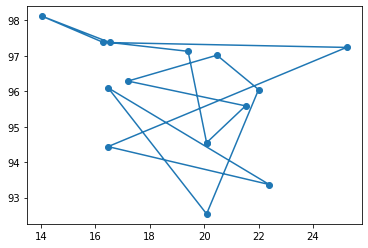

In [30]:
sol = best
sol.append(sol[0])
sol_coords = []
sol_lat = []
sol_long = []

for i in range(0,len(sol)):
    sol_coords.append(cities[sol[i]])
    sol_lat.append(LAT[sol[i]])
    sol_long.append(LON[sol[i]])
    
print(sol_coords)

plot(sol_lat,sol_long, '-o')
#plot.show()

bestDistance = fitness(best)

print("Meilleur route : ", best)
print("Plus court chemin : ", fitness(best))

In [31]:
print(cities)

[(16.47, 96.1), (16.47, 94.44), (20.09, 92.54), (22.39, 93.37), (25.23, 97.24), (22.0, 96.05), (20.47, 97.02), (17.2, 96.29), (16.3, 97.38), (14.05, 98.12), (16.53, 97.38), (21.52, 95.59), (19.41, 97.13), (20.09, 94.55)]
